<a href="https://colab.research.google.com/github/ranjan717/Machine_learning_Projects/blob/main/Lab_work_Jyotiranjan_GAN%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [2]:
latent_space_samples = torch.randn(1, 100)

In [3]:
print(latent_space_samples)

tensor([[-8.6662e-01, -1.3094e+00,  2.8380e+00, -1.3323e+00,  1.7680e-01,
          1.6214e+00,  1.0601e+00,  1.5987e-01,  6.3553e-02, -1.2529e+00,
          2.1306e+00, -1.8091e+00, -4.4347e-01, -1.3511e+00, -1.2702e+00,
          1.3585e+00,  6.9319e-01,  7.7237e-01,  1.5014e+00,  1.4575e+00,
          6.7268e-01,  1.8053e+00, -8.5479e-01, -3.7586e+00,  1.5140e+00,
          1.1981e-03, -3.8497e-01, -1.1761e+00, -4.5774e-01, -1.4162e+00,
         -1.9028e+00,  6.2634e-01, -6.3423e-01,  2.4724e-01, -3.9083e-01,
          1.5379e+00,  7.5203e-01, -6.3730e-01,  2.8583e-02, -8.1276e-01,
         -1.3765e+00, -1.9742e+00, -1.4897e+00, -1.5337e-01, -1.4855e+00,
         -1.0755e+00,  3.1057e-01, -1.7340e+00, -9.7139e-01, -3.6486e-01,
         -5.3216e-01, -1.9723e+00, -3.5665e-01,  1.0039e+00,  5.0972e-01,
          2.0649e-01,  6.3942e-01,  2.2354e+00, -7.3348e-01,  4.7179e-01,
         -1.8696e-02, -6.7141e-01, -8.1801e-01, -1.1562e+00,  5.5245e-01,
          6.2586e-01, -1.9945e+00, -4.

Preparing the training data

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [6]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 403kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.22MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.99MB/s]


In [7]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

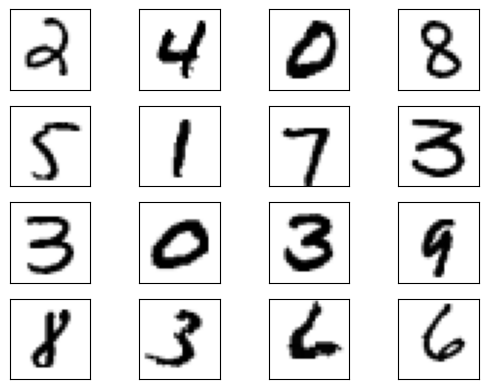

In [8]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

Implement Generator and Discriminator

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output